In [12]:
import pandas as pd
import numpy as np
import geopandas as gpd

# Commuting Zones in Lebanon

In [2]:
movement_range = pd.read_csv('../../data/movement/1922039342088483_2023-08-01_2023-08-21_csv/1922039342088483_2023-08-01.csv')
commuting_zones = pd.read_csv('../../data/movement/536501471557971_2023-01-01_2023-03-06_csv/536501471557971_2023-03-05.csv')

In [45]:
from shapely.wkt import loads
import matplotlib.pyplot as plt

commuting_zones_lebanon = commuting_zones[(commuting_zones['country']=='Lebanon')]

commuting_zones_lebanon['GEOMETRY'] = commuting_zones_lebanon['GEOMETRY'].apply(lambda x: loads(x))

commuting_zones_lebanon = gpd.GeoDataFrame(commuting_zones_lebanon, crs="EPSG:4326",geometry = commuting_zones_lebanon['GEOMETRY'])

C:\Users\sahit\AppData\Local\Temp\ipykernel_12756\2354877175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commuting_zones_lebanon['GEOMETRY'] = commuting_zones_lebanon['GEOMETRY'].apply(lambda x: loads(x))


Text(0.5, 1.0, 'Estimated population counts')

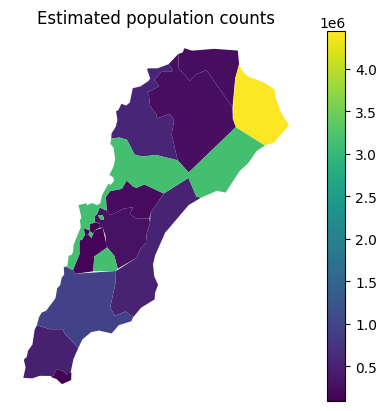

In [53]:
commuting_zones_lebanon.plot(column='win_population', legend = True)
plt.axis('off')
plt.title('Estimated population counts')

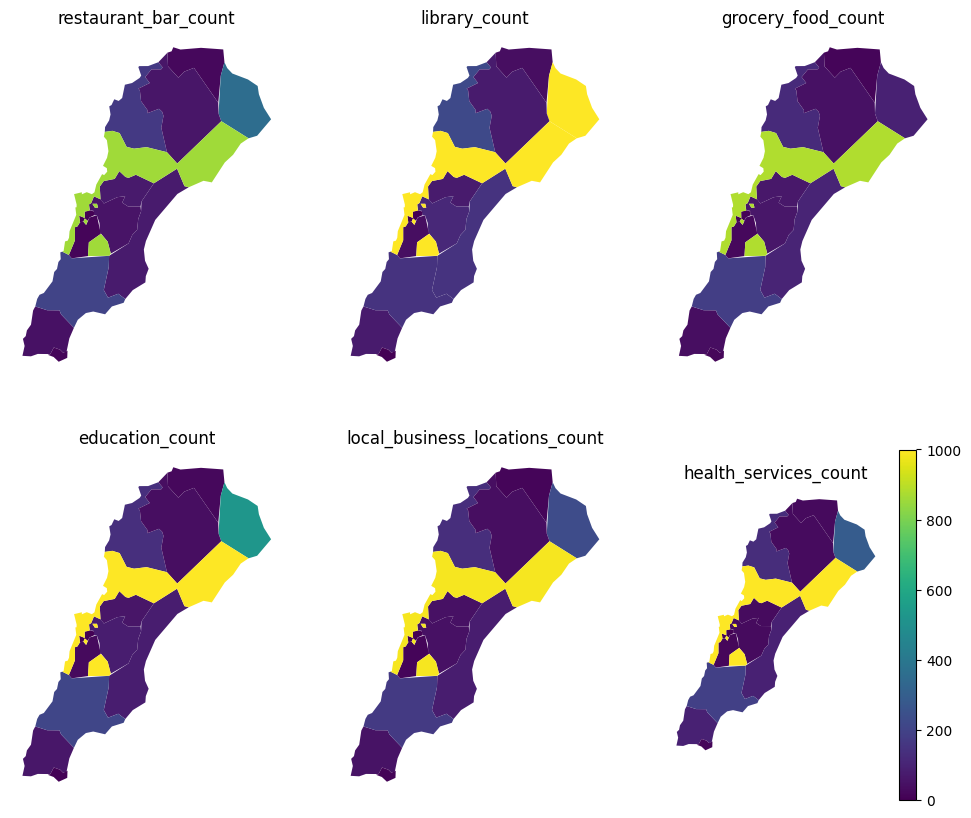

In [46]:
fig, axs = plt.subplots(2,3, figsize=(12,10))
ax = axs.flatten()

plt.axis('off')

for idx, type in enumerate(['restaurant_bar_count',
       'library_count', 'grocery_food_count', 'education_count',
       'local_business_locations_count', 'health_services_count']):
    if idx==5:
        legend_bool = True
    else:
        legend_bool = False
    commuting_zones_lebanon.plot(column=type, ax=ax[idx], vmin=0, vmax=1000, legend = legend_bool)
    ax[idx].set_title(type)
    ax[idx].axis('off')

## Observations 

* The area close to the Syrian border appears to have a lot of economic activity and population